In [2]:
import pandas as pd
import importlib
import berechnen_wp, pv_profil, lastprofile_VDI4655, temperatur_aussen, try_region, heizkurve
importlib.reload(berechnen_wp)
importlib.reload(heizkurve)

h, w, twe, s = lastprofile_VDI4655.get_jahresenergiebedarf('1984 - 1994', 200, 3, 0)
TRY_region, T_n_aussen = try_region.get_try_t_n_aussen(40599)
df = lastprofile_VDI4655.get_lastprofile(w, 4000, twe, 200, TRY_region, 3)
df['T_aussen'] = temperatur_aussen.get_hourly_temperature(40599, 2014)
hz, T_soll, T_n_vor, T_n_rueck = heizkurve.get_heizkurve('Heizkörper', df['T_aussen'], T_n_aussen)
df['T_vor'] = hz['T_vor']
df['T_rueck'] = hz['T_rueck']
wp_groesse, nenn_heizleistung = berechnen_wp.get_waermepumpe(h)
heizleistung_auslegung = heizkurve.get_heizleistung(T_n_aussen, h, T_soll)
df = heizkurve.get_heizleistung_profil(df, heizleistung_auslegung)
df = heizkurve.get_cop(wp_groesse, df)

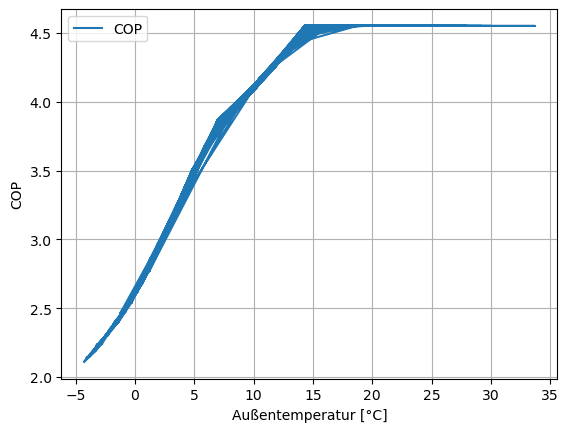

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df['T_aussen'], df['COP'],)
plt.xlabel('Außentemperatur [°C]')
plt.ylabel('COP')

plt.grid(True)
plt.legend(['COP'])

# Diagramm anzeigen
plt.show()

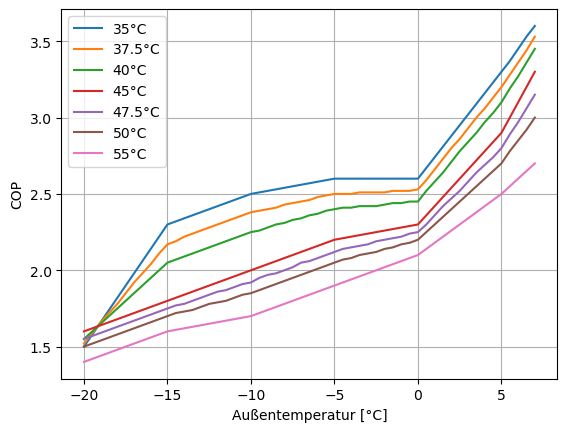

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
cop = pd.read_csv("./Inputs/COP_Nibe F2040-6.csv")
%matplotlib inline
plt.plot(cop.iloc[:, 0] , cop[['35.0','37.5','40.0','45.0','47.5','50.0', '55.0']])
plt.xlabel('Außentemperatur [°C]')
plt.ylabel('COP')

plt.grid(True)
plt.legend(['35°C','37.5°C','40°C','45°C','47.5°C','50°C', '55°C'])

# Diagramm anzeigen
plt.show()

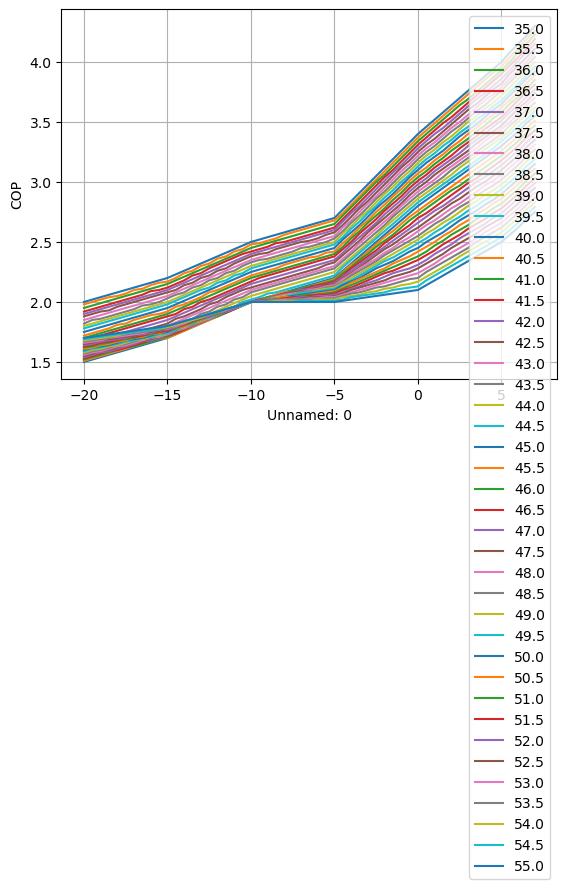

In [30]:
%matplotlib inline
# Erster Spalte als X-Achse verwenden
x = cop.iloc[:, 0]  # Erste Spalte als x-Werte

# Restliche Spalten als Y-Werte verwenden
y_columns = cop.columns[1:]  # Alle Spalten außer der ersten

# Plot erstellen
plt.plot(x, cop[y_columns])

# Achsenbeschriftungen setzen
plt.xlabel(cop.columns[0])  # Name der ersten Spalte als x-Label
plt.ylabel('COP')

# Gitter und Legende
plt.grid(True)
plt.legend(y_columns)

# Diagramm anzeigen
plt.show()